<a href="https://colab.research.google.com/github/michaeledge27/mathModeling/blob/main/projects/gamblingSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [118]:
wheel_spin = random.randint(0, 37)

In [119]:
if wheel_spin < 1 or wheel_spin > 36:     # wheel spin is a 0 or 37
    wheel_spin = 'green'
elif wheel_spin >= 1 and wheel_spin <= 18:  # wheel spin is between 1 and 18 inclusive
    wheel_spin = 'red'
elif wheel_spin >= 19 and wheel_spin <= 36:  # wheel spin is between 19 and 36 inclusive
    wheel_spin = 'black'

In [120]:
bet = ['red', 1]    # make bet on red for $1

In [121]:
loss_counter = 0    # keep track of losses

In [122]:
if wheel_spin == bet[0]:
    print('win')
else:
    loss_counter += 1
    bet[1] *= 2   # double your bet
    #spin wheel again and bet

win


In [123]:
def spin_wheel():
    wheel_spin = random.randint(0, 37)
    if wheel_spin < 1 or wheel_spin > 36:     # wheel spin is a 0 or 37
        color = 'green'
    elif wheel_spin >= 1 and wheel_spin <= 18:  # wheel spin is between 1 and 18 inclusive
        color = 'red'
    elif wheel_spin >= 19 and wheel_spin <= 36:  # wheel spin is between 19 and 36 inclusive
        color = 'black'
    return wheel_spin, color

In [124]:
spin_wheel()

(12, 'red')

In [125]:
def bet_on(bet_color, bet_amount, max_attempts):
    loss_counter = 0
    win = False
    for _ in range(max_attempts):
        number, spin_color = spin_wheel()
        if bet_color == spin_color:        # Limit the number of attempts
            win = True
            return bet_amount, loss_counter
        else:
            loss_counter += 1
            bet_amount *= 2

    return bet_amount, loss_counter

In [126]:
bet_on('red', 1, 15)

(1, 0)

In [127]:
num_of_losses = {}
for i in range(1000):
    max_attempts = 1000
    bet_amount, loss_counter = bet_on('red', 1, max_attempts)
    if loss_counter in num_of_losses:
        num_of_losses[loss_counter] += 1
    else:
        num_of_losses[loss_counter] = 1
bet_amounts = []
loss_counters = []
for i in range(1000):
    max_attempts = 1000
    bet_amount, loss_counter = bet_on('red', 1, max_attempts)
    bet_amounts.append(bet_amount)
    loss_counters.append(loss_counter)


In [128]:
num_of_losses.keys()

dict_keys([1, 0, 3, 2, 5, 6, 4, 9, 8, 7])

In [129]:
wins = []
losses = []
for bet_amount in bet_amounts:
    if bet_amount <= 1024
        wins.append(bet_amount)
    else:
        losses.append(bet_amount)

In [ ]:
wins = []                 # this isn't totally working yet I want it to perform the same as ^
losses = []
for j in list(num_of_losses.keys()):
    bet_amount = 2 ** j
    if bet_amount <= 1024:
        wins.append(bet_amount)
    else:
        losses.append(bet_amount)

In [137]:
loss_percentage = len(losses) / len(bet_amounts) * 100
print(f"Loss percentage: {loss_percentage:.2f}%")

Loss percentage: 0.00%


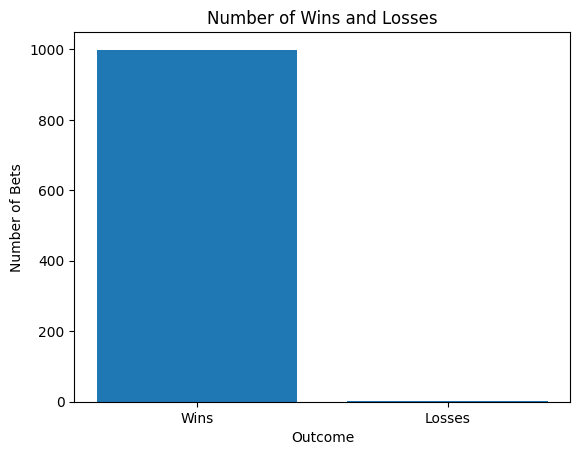

In [109]:
plt.bar(['Wins', 'Losses'], [len(wins), len(losses)])
plt.xlabel('Outcome')
plt.ylabel('Number of Bets')
plt.title('Number of Wins and Losses')
plt.show()

In [97]:
print(f"maximum bet = {max(bet_amounts)}")
print(f"maximum loss = {max(loss_counters)}")
print(f"average bet = {np.mean(bet_amounts)}")
print(f"average loss = {np.mean(loss_counters)}")
print(f"maximum bet index = {np.argmax(bet_amounts)}")
print(f"maximum loss index = {np.argmax(loss_counters)}")

maximum bet = 2048
maximum loss = 11
average bet = 6.309
average loss = 1.035
maximum bet index = 699
maximum loss index = 699


In [99]:
myKeys = list(num_of_losses.keys())
myKeys.sort()

# Sorted Dictionary
sd = {i: num_of_losses[i] for i in myKeys}
print(sd)

{0: 470, 1: 248, 2: 136, 3: 65, 4: 29, 5: 22, 6: 16, 7: 6, 8: 6, 12: 1, 13: 1}


In [100]:
keys = list(num_of_losses.keys())
values = list(num_of_losses.values())

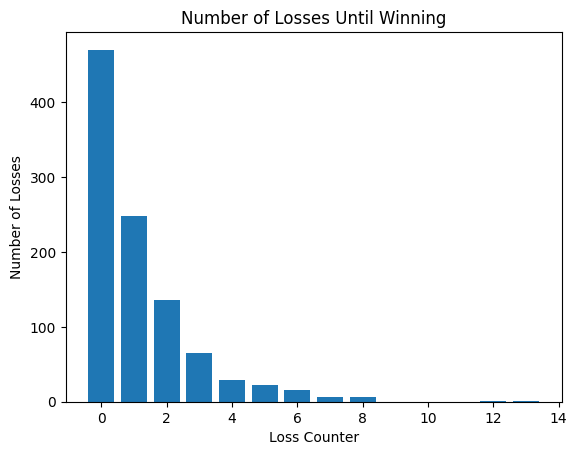

In [106]:
plt.bar(keys, values)
plt.xlabel('Loss Counter')
plt.ylabel('Number of Losses')
plt.title('Number of Losses Until Winning')
plt.show()

In [83]:
bet_amounts[:20]

[128, 1, 1, 4, 2, 1, 2, 4, 1, 2, 2, 1, 4, 1, 1, 1, 2, 2, 2, 1]

In [104]:
loss_transformed = []
for key in myKeys:
    if key == 0:
        loss_transformed.append(1)
    else:
      loss_transformed.append(key**2)

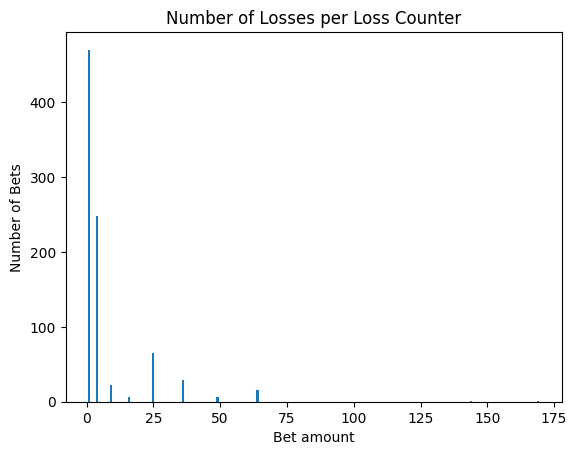

In [105]:
plt.bar(loss_transformed, values)
plt.xlabel('Bet amount')
plt.ylabel('Number of Bets')
plt.title('Number of Losses per Loss Counter')
plt.show()

Text(0, 0.5, 'Bet Amount')

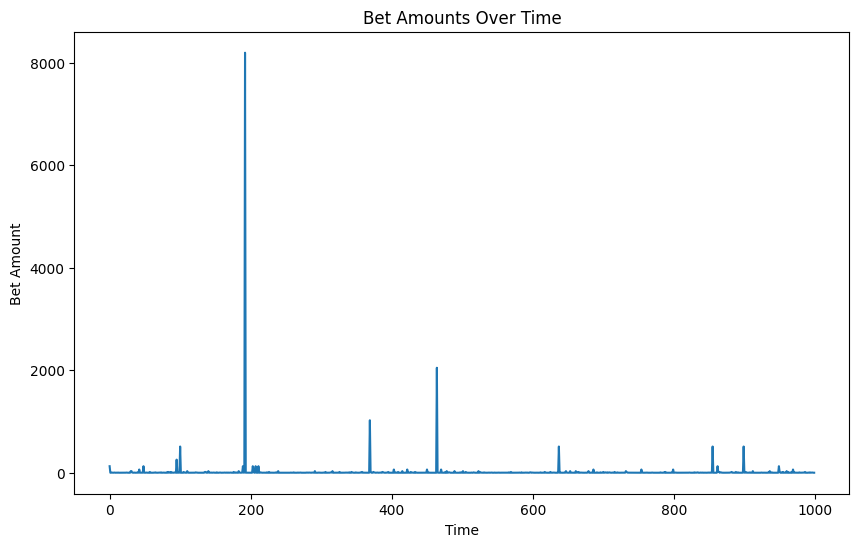

In [89]:
plt.figure(figsize=(10, 6))
plt.plot(bet_amounts)
plt.title('Bet Amounts Over Time')
plt.xlabel('Time')
plt.ylabel('Bet Amount')

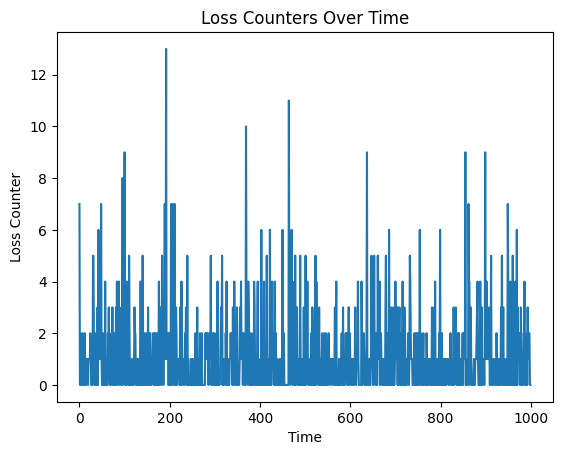

In [86]:
plt.plot(loss_counters)
plt.title('Loss Counters Over Time')
plt.xlabel('Time')
plt.ylabel('Loss Counter')
plt.show()

Maximum number of bets before winning: 11
Percentage of games lost everything: 0.20%


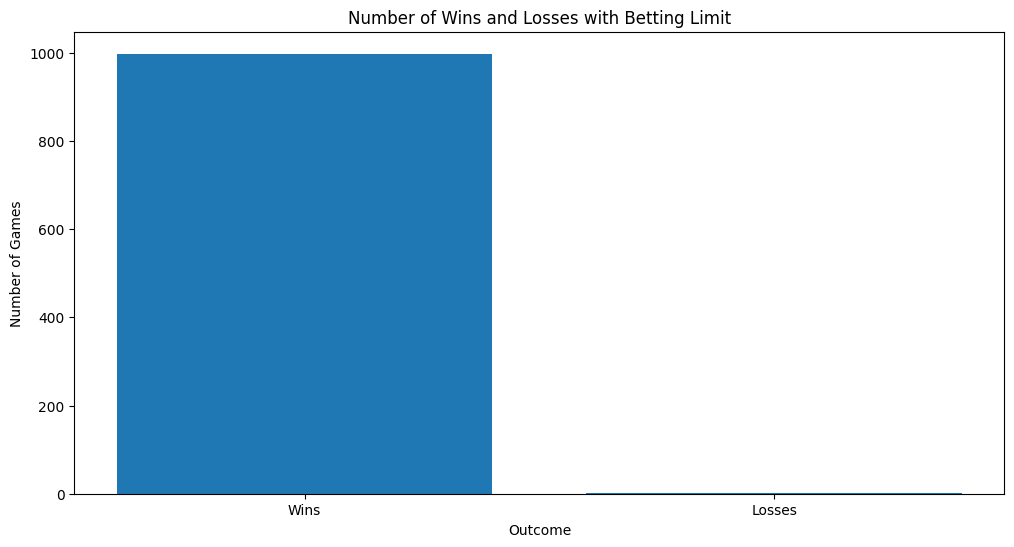

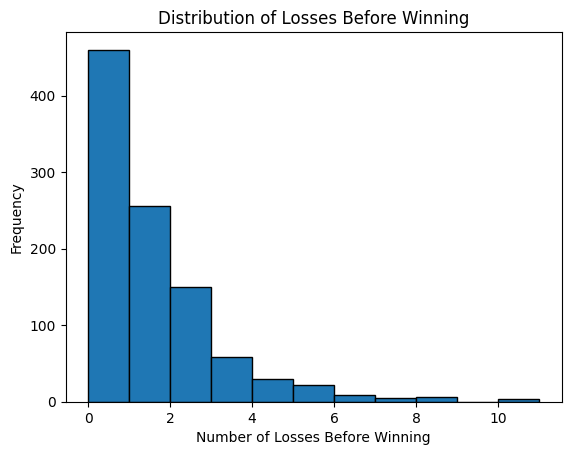

In [110]:
def spin_wheel():
    """Simulate a spin on a Las Vegas roulette wheel."""
    wheel_spin = random.randint(0, 37)
    if wheel_spin < 1 or wheel_spin > 36:     # Wheel spin is 0 or 37 (green)
        return 'green'
    elif 1 <= wheel_spin <= 18:               # Red sectors
        return 'red'
    else:                                      # Black sectors
        return 'black'

def bet_on_red(max_bet=1024):
    """
    Simulates the 'double up' betting strategy on red.

    Parameters:
        max_bet (int): The maximum betting limit set by the house.

    Returns:
        max_bet_size (int): The maximum bet placed before winning.
        loss_count (int): The total losses incurred before winning or losing everything.
        lost_all (bool): Whether the player reached the maximum bet limit without winning.
    """
    bet_amount = 1
    loss_count = 0
    max_bet_size = bet_amount

    while bet_amount <= max_bet:
        if spin_wheel() == 'red':  # Win on red
            return max_bet_size, loss_count, False
        else:  # Loss, double the bet
            loss_count += 1
            bet_amount *= 2
            max_bet_size = max(max_bet_size, bet_amount)

    # Player lost everything if the betting limit is reached
    return max_bet_size, loss_count, True

# Simulation
num_trials = 1000
loss_counts = []
max_bet_sizes = []
total_losses = 0

for _ in range(num_trials):
    max_bet_size, loss_count, lost_all = bet_on_red(max_bet=1024)
    max_bet_sizes.append(max_bet_size)
    loss_counts.append(loss_count)
    if lost_all:
        total_losses += 1

# Results
print(f"Maximum number of bets before winning: {max(loss_counts)}")
print(f"Percentage of games lost everything: {100 * total_losses / num_trials:.2f}%")

# Plotting results
plt.figure(figsize=(12, 6))
plt.bar(['Wins', 'Losses'], [num_trials - total_losses, total_losses])
plt.xlabel('Outcome')
plt.ylabel('Number of Games')
plt.title('Number of Wins and Losses with Betting Limit')
plt.show()

plt.hist(loss_counts, bins=range(max(loss_counts) + 1), edgecolor='black')
plt.xlabel('Number of Losses Before Winning')
plt.ylabel('Frequency')
plt.title('Distribution of Losses Before Winning')
plt.show()